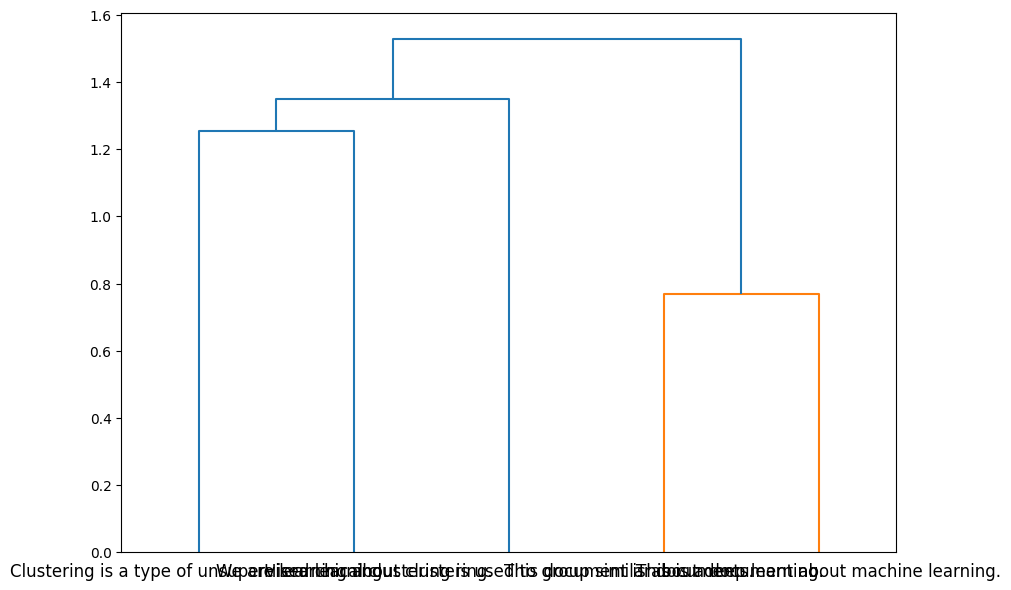

AttributeError: module 'gradio' has no attribute 'outputs'

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import gradio as gr

# Prepare the dataset
data = {
    'text': [
        'This is a document about machine learning.',
        'This document is about deep learning.',
        'We are learning about clustering.',
        'Clustering is a type of unsupervised learning.',
        'Hierarchical clustering is used to group similar documents.'
    ]
}

df = pd.DataFrame(data)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

# Apply hierarchical clustering
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model.fit(X.toarray())

# Add cluster labels to the dataframe
df['cluster'] = model.labels_

# Plot the dendrogram
linked = linkage(X.toarray(), 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['text'].values, distance_sort='descending', show_leaf_counts=True)
plt.show()

# Function to get clustered documents
def get_clusters():
    clusters = df.groupby('cluster')['text'].apply(list).to_dict()
    return clusters

# Gradio interface to display clusters
cluster_interface = gr.Interface(
    fn=get_clusters,
    inputs=[],
    outputs=gr.outputs.JSON(label="Clustered Documents")
)

# Launch the Gradio interface
cluster_interface.launch()
